In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [272]:
df = pd.read_csv('visualization_daft_ie.csv')

In [273]:
df

price  numBedrooms  numBathrooms  propertySize  total_images  \
0     290000            3             3          96.0          16.0   
1     225000            3             2          93.0          33.0   
2     575000            4             3         162.0          38.0   
3     120000            3             1          68.0           5.0   
4     400000            4             3         113.0          20.0   
...      ...          ...           ...           ...           ...   
3573  185000            4             3         125.0          34.0   
3574  235000            3             3         103.0          24.0   
3575  149500            3             1          82.0          14.0   
3576  170000            4             2         128.0          38.0   
3577  250000            3             2         116.0          69.0   

      longitude   latitude ber_rating featuredLevel    propertyType  \
0     -8.382500  51.822940         C2      featured  End of Terrace   
1     -7.177098  53.157465         C1      featured          Semi-D   
2     -6.342763  53.269493         A3      featured          Semi-D   
3     -6.879797  53.728601          G      featured         Terrace   
4     -8.614786  51.883612         C1      featured          Semi-D   
...         ...        ...        ...           ...             ...   
3573  -8.315556  51.849705         A3      standard          Semi-D   
3574  -7.212145  53.647194         A1      standard          Semi-D   
3575  -6.753848  54.115088         A3      standard        Bungalow   
3576  -8.652927  52.664558         A2      standard        Detached   
3577  -6.792938  53.166008         A3      standard        Bungalow   

           sellerType  
0       BRANDED_AGENT  
1       BRANDED_AGENT  
2       BRANDED_AGENT  
3       BRANDED_AGENT  
4       BRANDED_AGENT  
...               ...  
3573    BRANDED_AGENT  
3574    BRANDED_AGENT  
3575  UNBRANDED_AGENT  
3576    BRANDED_AGENT  
3577  UNBRANDED_AGENT  

[3578 rows x 11 columns]

In [274]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [298]:
import folium
from folium.plugins import MarkerCluster

# Create a map around the avg location
map_center = [df['latitude'].mean(), df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# group nearby markers 
marker_cluster = MarkerCluster().add_to(mymap)

# Add each property as a marker on the map
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Index: {idx}, Price: {row['price']}, Bedrooms: {row['numBedrooms']}, Bathrooms: {row['numBathrooms']}",
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(marker_cluster)


# Display the map in Jupyter Notebook (i think only works in Jupyter environment)
mymap


In [299]:
# checking latitude and longitute of the row that was set in USA
# house link on google: https://www.cohalandowning.ie/property/6-ashgrove-drive-ballyvolane/
df[3526:3527]

price  numBedrooms  numBathrooms  propertySize  total_images  \
3526  295000            3             1          84.0           4.0   

      longitude  latitude ber_rating featuredLevel propertyType     sellerType  
3526    -8.4446   51.9044        XXX      standard     Detached  BRANDED_AGENT

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578 entries, 0 to 3577
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3578 non-null   int64  
 1   numBedrooms    3578 non-null   int64  
 2   numBathrooms   3578 non-null   int64  
 3   propertySize   3578 non-null   float64
 4   total_images   3578 non-null   float64
 5   longitude      3578 non-null   float64
 6   latitude       3578 non-null   float64
 7   ber_rating     3578 non-null   object 
 8   featuredLevel  3578 non-null   object 
 9   propertyType   3578 non-null   object 
 10  sellerType     3578 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 307.6+ KB


In [301]:
df.describe()

price  numBedrooms  numBathrooms  propertySize  total_images  \
count  3.578000e+03  3578.000000   3578.000000   3578.000000   3578.000000   
mean   3.449569e+05     3.108440      2.065400    117.500838     18.735886   
std    2.664347e+05     1.146024      1.085742     63.460832     10.637171   
min    2.000000e+04     1.000000      1.000000      1.000000      0.000000   
25%    1.986250e+05     2.000000      1.000000     78.000000     12.000000   
50%    2.800000e+05     3.000000      2.000000    102.000000     17.000000   
75%    3.950000e+05     4.000000      3.000000    135.000000     23.000000   
max    4.500000e+06    16.000000     13.000000    579.000000    104.000000   

         longitude     latitude  
count  3578.000000  3578.000000  
mean     -7.341592    53.131521  
std       1.136380     0.675296  
min     -10.377464    51.486204  
25%      -8.403228    52.669098  
50%      -6.958348    53.302160  
75%      -6.292596    53.424796  
max      -6.028016    55.299693

In [340]:
print(f"Max price:€{df['price'].max()} \nMin price:€{df['price'].min()} ")

Max price:€4500000 
Min price:€20000 


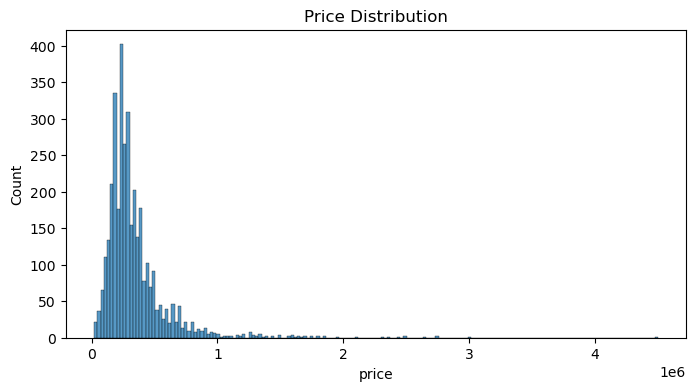

In [318]:
#  1e6 is scientific notation for 10^6 which is 1000000 (1 million)
plot_or_count_distribution(df, 'price', 'Price Distribution')

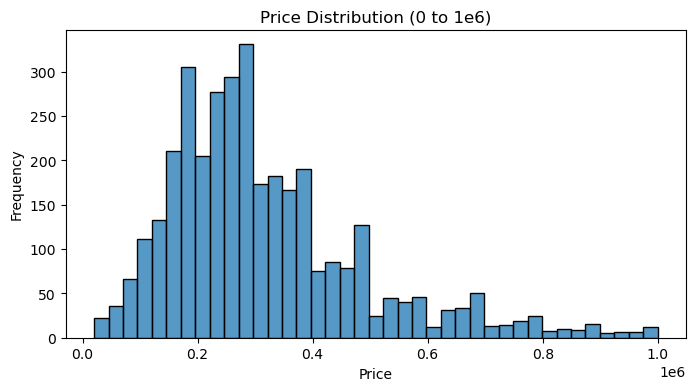

In [319]:
filtered_df = df[(df['price'] > 0) & (df['price'] <= 1e6)]
    
# Plotting the filtered data between 0 to 1m
plt.figure(figsize=(8, 4))
sns.histplot(filtered_df['price'])
plt.title('Price Distribution (0 to 1e6)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

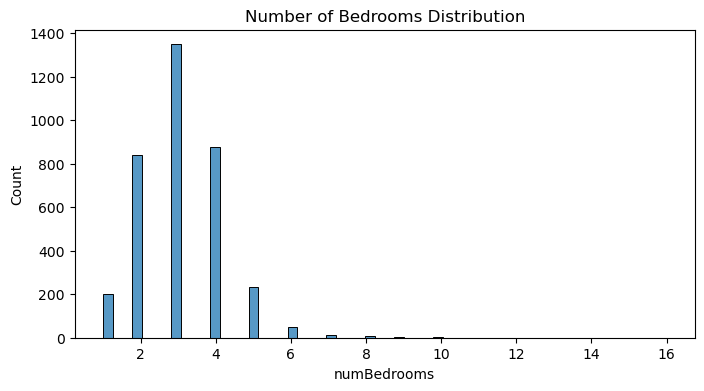

In [320]:
# bedrooms
plot_or_count_distribution(df, 'numBedrooms', 'Number of Bedrooms Distribution')

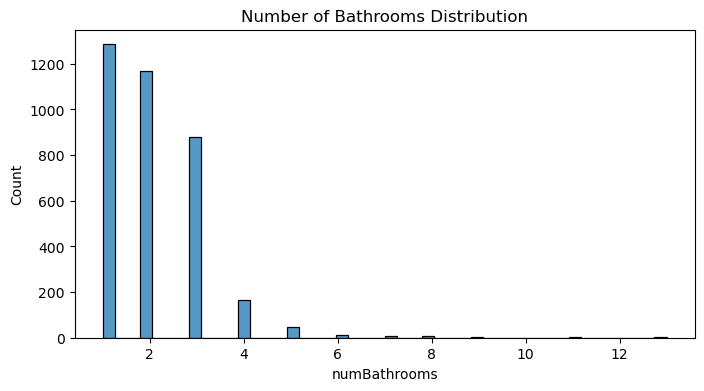

In [372]:
# bathrooms
plot_or_count_distribution(df, 'numBathrooms', 'Number of Bathrooms Distribution')

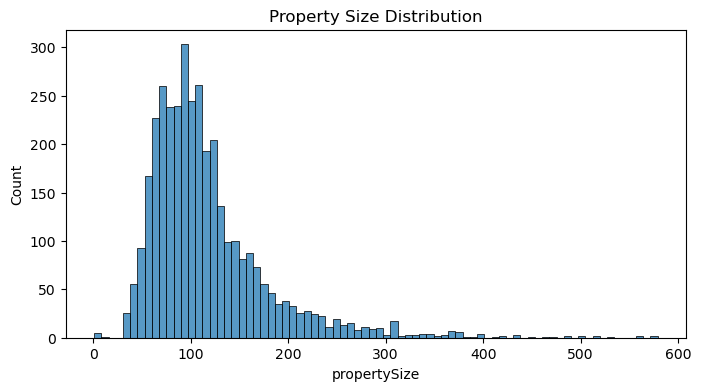

In [375]:
# property Size
plot_or_count_distribution(df, 'propertySize', 'Property Size Distribution')

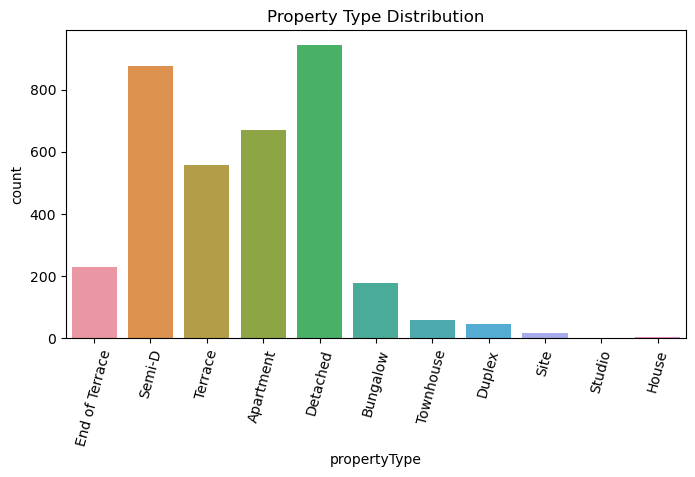

In [376]:
# property Type
plot_or_count_distribution(df, 'propertyType','Property Type Distribution' )

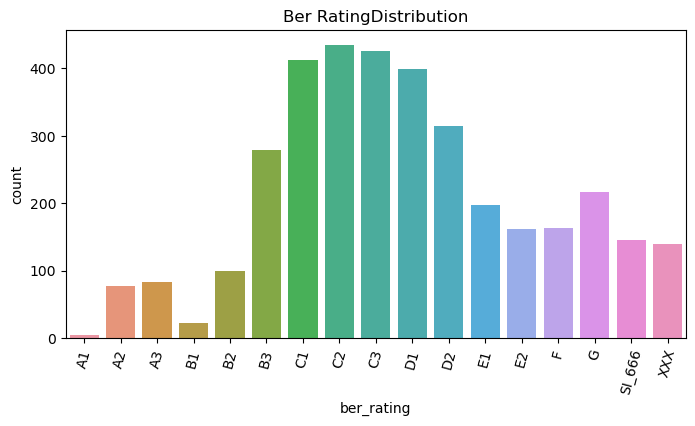

In [377]:
plot_or_count_distribution(df, 'ber_rating','Ber RatingDistribution' )


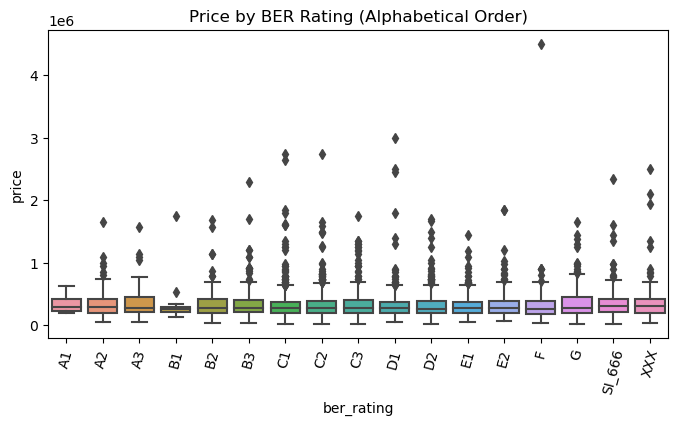

In [378]:
#
boxplot(df, 'ber_rating', 'price', 'Price by BER Rating (Alphabetical Order)')

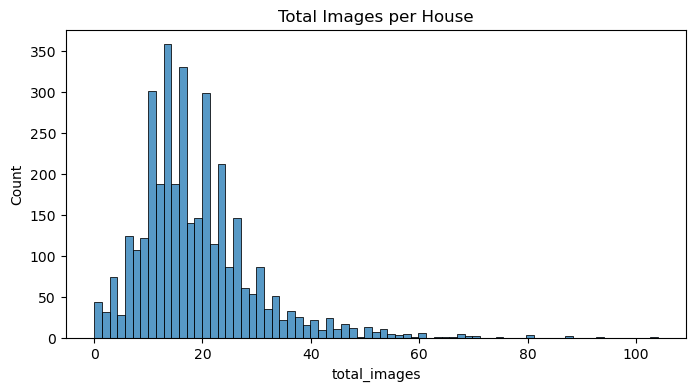

In [379]:
plot_or_count_distribution(df, 'total_images','Total Images per House' )

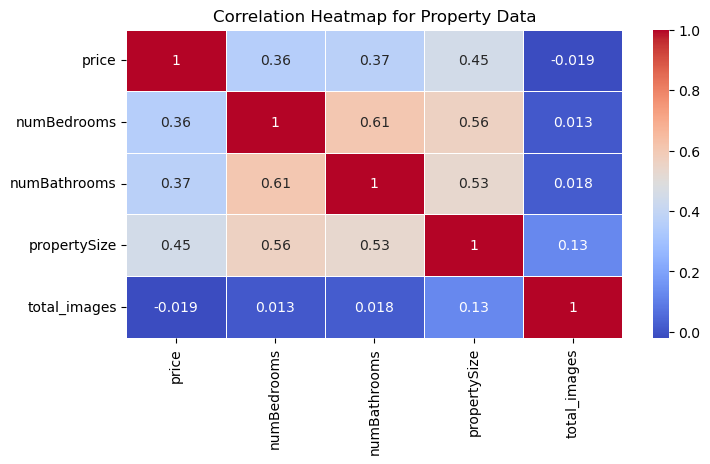

In [380]:
# last column added to better show correlation of the factors that actually matters
plot_correlation_heatmap(df, ['price', 'numBedrooms', 'numBathrooms', 'propertySize', 'total_images'], 'Correlation Heatmap for Property Data')

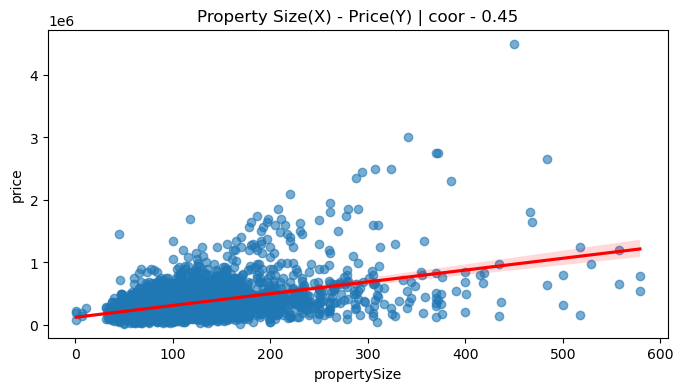

In [381]:
# 3 scatter plot 
scatter_plot('propertySize', 'price', 'Property Size(X) - Price(Y) | coor - 0.45')

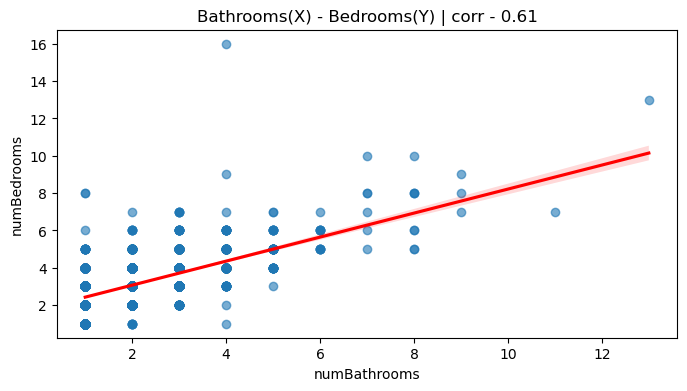

In [359]:
scatter_plot('numBathrooms', 'numBedrooms', 'Bathrooms(X) - Bedrooms(Y) | corr - 0.61')

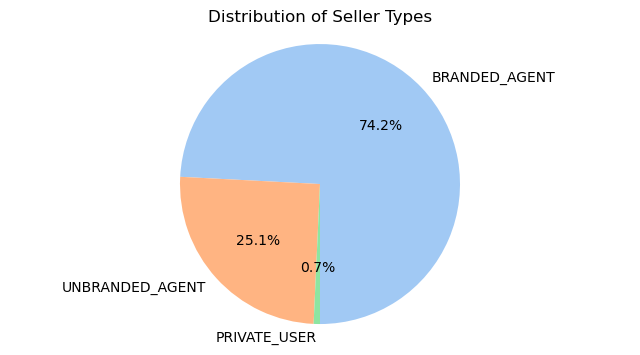

In [360]:
# 
plot_pie_chart(df, 'sellerType', 'Distribution of Seller Types')

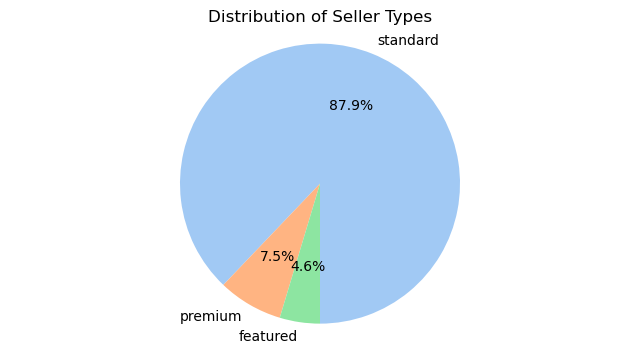

In [361]:
"""
​ Standard Ad: The basic listing with good value but appears below featured and premium ads in search results. 
It provides standard visibility on Daft.ie
​ Featured Ad: Positioned above standard ads, featured ads are larger and more visible to users, 
offering better prominence on listings
​ Premium Ad: Top placement with 4-6x more views, larger ad size, unlimited photos, 
and 30 days of priority, ensuring maximum exposure
"""

plot_pie_chart(df, 'featuredLevel', 'Distribution of Seller Types')

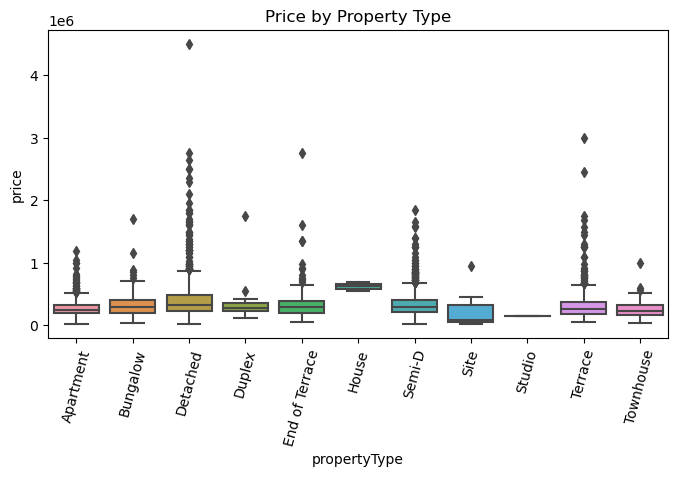

In [332]:
boxplot(df, 'propertyType', 'price', 'Price by Property Type')

<h1 align = 'center'>Functions</h1>

In [374]:
# 1
def plot_or_count_distribution(df, column_name, title):
    """
    display the amount in each column or to count the amount of houses
    # https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html
    if numeric use histplot
    else use counplot
    """
    plt.figure(figsize=(8, 4))
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Use histogram for numerical columns
        sns.histplot(df[column_name])
    else:
        # Sort alphabetically for BER Rating
        if column_name == 'ber_rating':
            sorted_order = sorted(df[column_name].unique())
        else:
            sorted_order = None
        
        sns.countplot(x=column_name, data=df, order=sorted_order)
        plt.xticks(rotation=75)  # Rotate labels if needed for categorical data

    plt.title(title)
    plt.show()
    
    
# 2
def plot_correlation_heatmap(df, columns, title):
    """
    plots a correlation for called columns in the df
    """
    # Calculate the correlation
    corr = df[columns].corr()
    # Create the heatmap
    plt.figure(figsize=(8, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()
    
    
# 3
def scatter_plot(x, y, title):
    """
    creates a scatter plot for two specified columns.
    """
    plt.figure(figsize=(8, 4))
    # Create scatter plot with regression line
    sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
# 4
import matplotlib.pyplot as plt

def plot_pie_chart(df, column_name, title):
    """
    pie chart for a specified categorical column.
    """
    data = df[column_name].value_counts()
    
    # pie chart
    plt.figure(figsize=(8, 4))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=270, colors=sns.color_palette('pastel'))
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
    plt.show()

# 5
def boxplot(df, x, y, title):
    """
    creates a sorted boxplot 
    """
    # Sort the x categories alphabetically
    sorted_order = sorted(df[x].unique())
    
    # Create the boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=x, y=y, data=df, order=sorted_order)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=75)  # Rotate labels if needed
    plt.show()

